# Explorando dados das Boias Piratas


http://www.goosbrasil.org/pirata/dados

In [1]:
import pandas as pd


url = "https://raw.githubusercontent.com/ocefpaf/2018-Jun-SWC-Floripa/master/data/dados_pirata.csv"

df = pd.read_csv(
    url,
    index_col="datahora",
    parse_dates=True,
    usecols=range(1, 15),
)

df.head()

,t_1,t_10,t_100,t_120,t_13,t_140,t_180,t_20,t_300,t_40,t_5,t_500,t_60
datahora,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,-99999.0,25.20,24.89,-99999.0,23.79,20.60,25.17,12.46,25.17,-99999.0,6.82,25.19
2005-08-25 12:00:00+00:00,25.19,-99999.0,25.17,24.72,-99999.0,23.61,20.31,25.18,12.27,25.18,-99999.0,6.85,25.21
2005-08-26 12:00:00+00:00,25.26,-99999.0,25.13,24.74,-99999.0,23.63,20.43,25.24,12.36,25.22,-99999.0,6.87,25.20
2005-08-27 12:00:00+00:00,25.23,-99999.0,25.04,24.77,-99999.0,23.74,20.10,25.19,12.23,25.19,-99999.0,6.86,25.14
2005-08-28 12:00:00+00:00,25.25,-99999.0,24.90,24.78,-99999.0,23.81,20.21,25.21,12.48,25.11,-99999.0,6.79,25.04


## Exercício: check a documentação do pandas, procure por *na_values*. O que isso faz? Como podemos usar aqui?

In [2]:
df = pd.read_csv(
    url,
    index_col="datahora",
    parse_dates=True,
    usecols=range(1, 15),
    na_values=-99999,
)

df.head()

,t_1,t_10,t_100,t_120,t_13,t_140,t_180,t_20,t_300,t_40,t_5,t_500,t_60
datahora,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,NaN,25.20,24.89,NaN,23.79,20.60,25.17,12.46,25.17,NaN,6.82,25.19
2005-08-25 12:00:00+00:00,25.19,NaN,25.17,24.72,NaN,23.61,20.31,25.18,12.27,25.18,NaN,6.85,25.21
2005-08-26 12:00:00+00:00,25.26,NaN,25.13,24.74,NaN,23.63,20.43,25.24,12.36,25.22,NaN,6.87,25.20
2005-08-27 12:00:00+00:00,25.23,NaN,25.04,24.77,NaN,23.74,20.10,25.19,12.23,25.19,NaN,6.86,25.14
2005-08-28 12:00:00+00:00,25.25,NaN,24.90,24.78,NaN,23.81,20.21,25.21,12.48,25.11,NaN,6.79,25.04


Truque para remover o *t_* e ordenar as colunas por profundidade.

In [3]:
df.columns = [
    f"{col.split('_')[1]:0>3}"
    for col in df.columns
]

df.sort_index(axis=1, inplace=True)
df.head()

,001,005,010,013,020,040,060,100,120,140,180,300,500
datahora,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,NaN,NaN,NaN,25.17,25.17,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00+00:00,25.19,NaN,NaN,NaN,25.18,25.18,25.21,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00+00:00,25.26,NaN,NaN,NaN,25.24,25.22,25.20,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00+00:00,25.23,NaN,NaN,NaN,25.19,25.19,25.14,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00+00:00,25.25,NaN,NaN,NaN,25.21,25.11,25.04,24.90,24.78,23.81,20.21,12.48,6.79


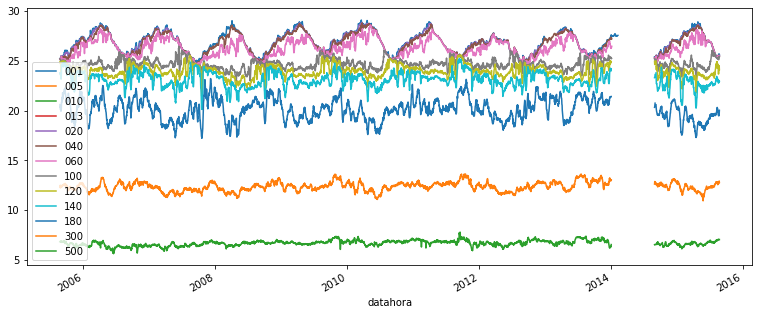

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(13, 5.25))
df.plot(ax=ax);

## Exercício: existe um "gap" de dados faltando bem grande entre 2014-2016, cheque a documentação do método *.dropna()* e veja como podemos utilizá-lo aqui para "limpar" os dados um pouco.

In [5]:
df.dropna(axis=1, how="all", inplace=True)

df.head()

,001,020,040,060,100,120,140,180,300,500
datahora,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,25.17,25.17,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00+00:00,25.19,25.18,25.18,25.21,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00+00:00,25.26,25.24,25.22,25.20,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00+00:00,25.23,25.19,25.19,25.14,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00+00:00,25.25,25.21,25.11,25.04,24.90,24.78,23.81,20.21,12.48,6.79


In [6]:
desc = df.describe()

desc

,001,020,040,060,100,120,140,180,300,500
count,3206.000000,2949.000000,3408.000000,3408.000000,3407.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,26.903054,26.856673,26.746086,26.283706,24.681382,23.947416,23.076496,20.080417,12.359806,6.675656
std,1.030174,0.999788,0.992836,0.840345,0.500878,0.607452,0.755077,1.081181,0.461918,0.266193
min,24.710000,24.820000,24.630000,24.550000,22.850000,21.450000,20.110000,17.210000,10.930000,5.620000
25%,26.020000,25.970000,25.880000,25.590000,24.350000,23.550000,22.590000,19.260000,12.050000,6.500000
50%,26.940000,26.900000,26.820000,26.210000,24.660000,23.920000,23.090000,20.100000,12.370000,6.700000
75%,27.750000,27.720000,27.580000,26.960000,24.990000,24.350000,23.620000,20.880000,12.670000,6.840000
max,29.090000,28.840000,28.790000,28.580000,26.450000,25.580000,25.180000,23.210000,13.630000,7.790000


## Exercício: usando o dataframe *desc* calcule a variância dos dados em cada profundidade.

In [7]:
desc.loc["std"] ** 2

001    1.061258
020    0.999577
040    0.985722
060    0.706179
100    0.250879
120    0.368998
140    0.570141
180    1.168953
300    0.213368
500    0.070859
Name: std, dtype: float64

O que está acontecendo em 180 m?

In [8]:
grouped = df.groupby(pd.Grouper(freq="Y"))

year = grouped.mean()
year = year.T
year

datahora,2005-12-31 00:00:00+00:00,2006-12-31 00:00:00+00:00,2007-12-31 00:00:00+00:00,2008-12-31 00:00:00+00:00,2009-12-31 00:00:00+00:00,2010-12-31 00:00:00+00:00,2011-12-31 00:00:00+00:00,2012-12-31 00:00:00+00:00,2013-12-31 00:00:00+00:00,2014-12-31 00:00:00+00:00,2015-12-31 00:00:00+00:00
001,26.276692,27.059973,26.679671,26.797077,27.280495,27.193489,27.242060,26.354192,26.801054,26.571006,27.401021
020,26.192462,26.971233,27.225764,26.251770,27.226429,27.142775,26.856767,26.304883,26.980208,26.204833,27.330936
040,26.007231,26.859233,26.563178,26.620464,27.128352,27.056648,26.763781,26.304973,26.816088,26.103200,27.279021
060,25.517538,26.497233,26.226795,25.906120,26.465549,26.604780,26.365644,26.061721,26.381543,25.671280,26.666468
100,24.636000,24.790000,24.779890,24.348579,24.744258,24.717473,24.793726,24.711093,24.629972,24.678226,24.610128
120,24.268538,23.979671,24.059534,23.599208,23.997198,24.050632,24.208219,23.947158,23.806612,24.009344,23.631532
140,23.729154,23.212411,23.095452,22.793361,22.997857,23.062802,23.549315,23.081093,22.954408,22.929754,22.582128
180,20.599769,20.438904,19.685479,20.214945,19.860879,19.634286,20.699562,19.913770,20.705427,19.940410,19.076426
300,12.362077,12.374027,12.034000,12.215055,12.451374,12.255412,12.649288,12.205383,12.734298,12.601148,12.174936
500,6.582231,6.389123,6.482521,6.672923,6.772088,6.772527,6.826548,6.699399,6.872893,6.605246,6.637745


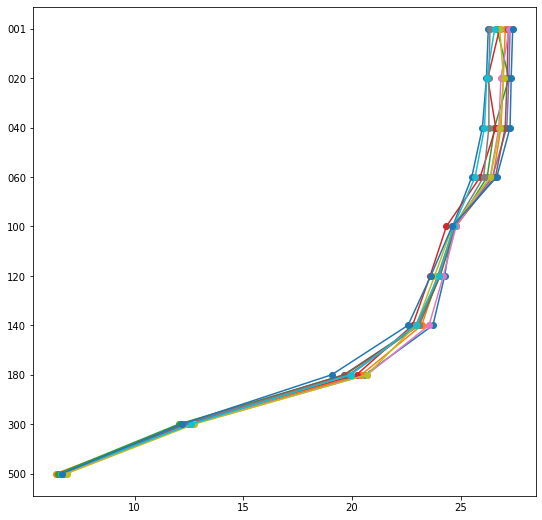

In [9]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.plot(year, year.index, "o-")
ax.invert_yaxis();

## Exercício:

- repita o `groupby` mas use meses ao invés de anos;
- plot as series temporais das médias dos meses.

In [10]:
grouped = df.groupby(pd.Grouper(freq="M"))

monthly = grouped.mean()

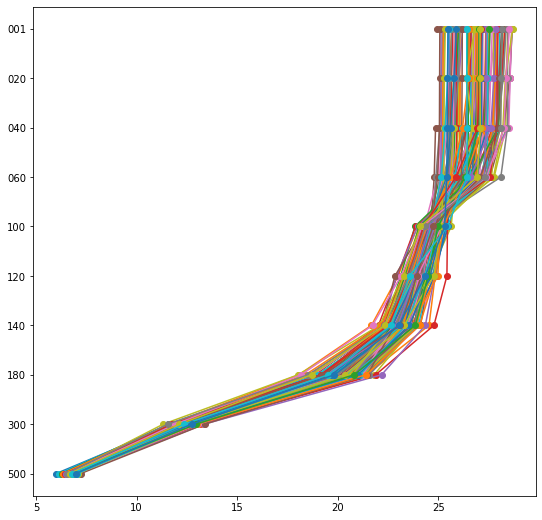

In [11]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.plot(monthly.T, monthly.T.index, "o-")
ax.invert_yaxis();

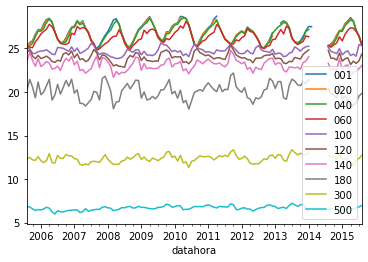

In [12]:
monthly.plot();

Uma forma de comparar as séries temporais com variâncias diferentes é normalizar pelo z-score:

$$ z = \frac{x - \mu}{\sigma} $$

In [13]:
zscore = (monthly - monthly.mean(axis=0)) / monthly.std()

zscore.head()

,001,020,040,060,100,120,140,180,300,500
datahora,,,,,,,,,,
2005-08-31 00:00:00+00:00,-1.551135,-1.569736,-1.538145,-1.360202,0.807872,1.126587,0.786700,0.103850,0.009586,0.725919
2005-09-30 00:00:00+00:00,-1.200917,-1.276258,-1.444633,-1.417834,0.671656,1.800520,2.442366,1.448467,0.295873,0.532654
2005-10-31 00:00:00+00:00,-0.969280,-1.016304,-1.167608,-1.477122,-0.644628,0.356722,0.903822,0.500241,-0.368194,-0.423355
2005-11-30 00:00:00+00:00,-0.273606,-0.305705,-0.396282,-0.657090,-0.680354,-0.285617,-0.224988,-0.814006,-0.530372,-1.207086
2005-12-31 00:00:00+00:00,0.277647,0.299677,0.263533,-0.127618,-0.148453,0.483560,1.257768,1.137027,0.527256,-0.775740


In [14]:
import hvplot.pandas


zscore.hvplot()

:NdOverlay   [Variable]
   :Curve   [datahora]   (value)

# Decompor o sinal

$$ y = trend + seasonal + residual $$

In [15]:
signal = df["001"].copy()

mean = signal.mean()
mask = signal.isnull()

## Tendência

In [16]:
import numpy as np
from scipy.signal import detrend


s = (signal-mean).fillna(0)
detrended_signal = detrend(s)

In [17]:
detrended_signal[mask] = np.NaN
detrended_signal = pd.Series(detrended_signal, index=signal.index)

trend =  signal - detrended_signal

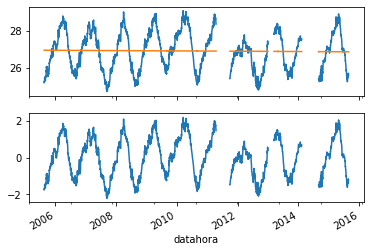

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)

signal.plot(ax=ax0, label="signal")
ax0.plot(signal.index, trend, label="trend")

detrended_signal.plot(ax=ax1, label="detrend");

Quais anos tem dados faltando?

In [19]:
set(detrended_signal[detrended_signal.isnull()].index.year)

{2009, 2010, 2011, 2012, 2013, 2014, 2015}

Antes de interpolar um pouco disso vamos olhar as "estatisticas" dos dados para não "inventar muito."

In [20]:
detrended_signal.describe()

count    3206.000000
mean       -0.002886
std         1.029804
min        -2.217834
25%        -0.890230
50%         0.038193
75%         0.841132
max         2.183320
dtype: float64

set()

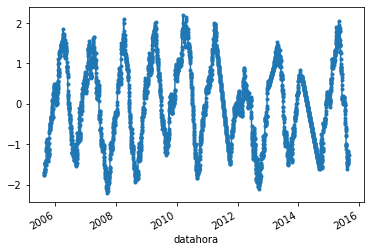

In [21]:
interped_signal = detrended_signal.interpolate(method="time")

interped_signal.plot(marker=".")
set(interped_signal[interped_signal.isnull()].index.year)

In [22]:
interped_signal.describe()

count    3653.000000
mean       -0.014684
std         1.003383
min        -2.217834
25%        -0.877673
50%         0.028586
75%         0.770364
max         2.183320
dtype: float64

Exercício: esse tipo de interolação é aceitável? Olhe a documentação do `.interpolate` e procure uma opção que nos ajude a melhorar isso!

count    3214.000000
mean       -0.002983
std         1.030181
min        -2.217834
25%        -0.890889
50%         0.038390
75%         0.841132
max         2.183320
dtype: float64

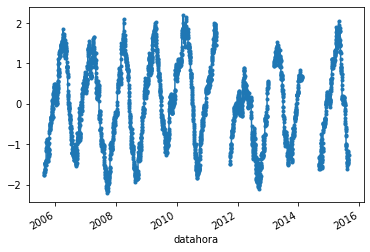

In [23]:
interped_signal = detrended_signal.interpolate(
    method="time",
    limit=1,
)


interped_signal.plot(marker=".")
interped_signal.describe()

In [24]:
set(interped_signal[interped_signal.isnull()].index.year)

{2011, 2013, 2014}

In [25]:
interped_signal_cutted = interped_signal.loc["2005":"2010-12"]

## Sazonalidade + ruído

$$ a\cos{(2\pi x + b)} $$

In [26]:
def cosine(x, a, b):
    return a * np.cos(2 * np.pi * x + b)

In [27]:
t = interped_signal_cutted.index.values
t = t - t[0]
t = t / np.timedelta64(1, "D") / 365

In [28]:
from scipy.optimize import curve_fit
from matplotlib.dates import date2num


(a, b), pcov = curve_fit(
    cosine,
    t,
    interped_signal_cutted,
)

In [29]:
a, b

(1.3735700959113617, 2.754274809942065)

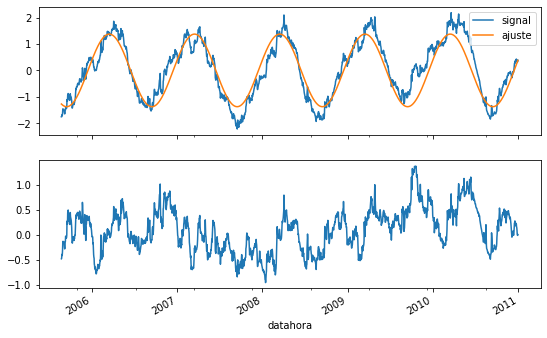

In [30]:
fitted = cosine(t, a, b)
res = interped_signal_cutted - fitted

fig, (ax0, ax1) = plt.subplots(
    nrows=2,
    sharex=True,
    figsize=(9, 5.75)
)

interped_signal_cutted.plot(ax=ax0, label="signal")
ax0.plot(
    interped_signal_cutted.index,
    fitted,
    label="ajuste"
)

ax0.legend()

res.plot(ax=ax1);

# Exercício: escolha outra boia e reproduza as análises desse notebook.


# Desafio 0: refaça o ajuste sem tirar a média/tendência e modificando a equação para achar *c*, ou seja, a tendência.

$$ a\cos{(2\pi x + b)} + c $$

# Desafio 1: parece existir um sinal mais longo no resíduo. Faça média vertical da camada de mistura (0-60), e refaça a análise com a série dessa média vertical. Isso deixara o sinal mais "robusto" (ou não ;-p).